In [182]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from skimage import io
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [134]:
df = pd.read_parquet('../data/main_df.parquet')

In [135]:
x = df['album_cover_local_name']
y = df['primary_album_genre']

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Create torchvision Dataset

In [288]:
class GenresDataset(Dataset):
    
    def __init__(self, df_slice, transform=None):
        
        assert df_slice in ['train', 'test', 'all'], 'Only "train", "test" or "all" are allowed'
        
        if df_slice == 'train':
            self.data = train_df
        elif df_slice == 'test':
            self.data = test_df
        else:
            self.data = df

        self.class_map = {
            "Jazz": 0,
            "R&B": 1,
            "Pop": 2,
            "Rap/Hip Hop": 3,
            "Alternative": 4,
            "Rock": 5,
            "Metal": 6,
            "Electro": 7
        }
        
        self.transform = transform

    def __len__(self):
        # len of our dataset
        return len(self.data)
    
    def __getitem__(self, idx):
        # magic func to get image and its class

        # path_to_image and name of image's class
        img_path = self.data.loc[idx, "album_cover_local_name"]
        class_name = self.data.loc[idx, "primary_album_genre"]
        
        # read image pixels
        image = io.imread(img_path)
        
        # read image's class and transform into tensor
        class_id = self.class_map[class_name]
        class_id = torch.tensor([class_id])

        if self.transform:
            image = self.transform(image)
        
        return image, class_id
    
    def get_info_about_album(self, idx):
        # func to read all necessary info about album
        return {"title": self.data.loc[idx, "album_title"],
                "artist": self.data.loc[idx, "album_artist"],
                "genre": self.data.loc[idx, "primary_album_genre"]}
    
    def album_cover(self, idx):
        # func to print album cover image
        img_path = self.data.loc[idx, "album_cover_local_name"]
        image = io.imread(img_path)
        plt.imshow(image);
    
    def get_numpy_of_image(self, idx):
        img_path = self.data.loc[idx, "album_cover_local_name"]
        image = io.imread(img_path)
        
        return image

In [294]:
q.get_info_about_album(3238)

{'title': 'Уроборос: Улица 36', 'artist': 'Скриптонит', 'genre': 'Rap/Hip Hop'}

In [295]:
albums = [3238, 4488, 2447, 1605, 3357, 2328, 3538, 3648, 6025]

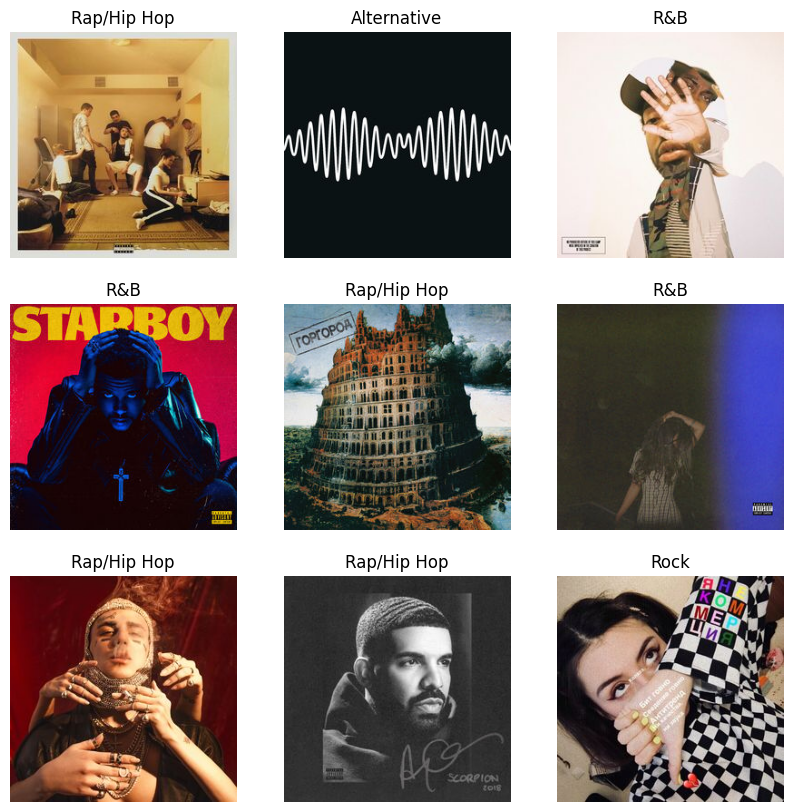

In [296]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

c = 0

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(q.get_numpy_of_image(albums[c]))
        ax[i][j].set(title=q.get_info_about_album(albums[c])['genre'])
        ax[i][j].axis('off')
        
        c += 1

plt.show()

# DataLoader

In [297]:
data_transform = transforms.Compose([
#     transforms.RandomSizedCrop(224),
    transforms.ToTensor(),
#     transforms.RandomHorizontalFlip(p=0.25),
#     transforms.RandomVerticalFlip(p=0.25),
#     transforms.RandomRotation(degrees=(-5, 5)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [298]:
train_dataset = GenresDataset(df_slice='train', transform=data_transform)
test_dataset = GenresDataset(df_slice='test', transform=data_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64)

# Model itself!

In [299]:
from torchvision import models

In [302]:
model = models.vgg19(pretrained=True)

In [307]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd